In [3]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from tabulate import tabulate 
from sklearn.externals import joblib 
import joblib as job
from sklearn.model_selection import train_test_split
import pickle as pk
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.manifold import TSNE
from tabulate import tabulate 
from sklearn.metrics import log_loss
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
# Utility Functions
def accuracy(actual,predicted):
    
      c = 0
      for i in range(len(actual)):
          if(actual[i]!=predicted[i]):
              continue
          else:    
              c = c + 1
      return c/len(actual)

def UTSNE(X):
  tsne = TSNE(n_components=2)
  df = tsne.fit_transform(X)
  return df
     

In [5]:
#2.1.
path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Dataset/MNIST_Subset.h5'

data = h5py.File(path, 'r')
X = data.get('X')
X = np.array(X).reshape(14251,784)
Y = data.get('Y')
Y = np.array(Y)

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
print('Xtrain shape :',XTrain.shape)
print('Ytrain shape :',YTrain.shape)
print('Xtest shape :',XTest.shape)
print('Ytest shape :',YTest.shape)

Xtrain shape : (11400, 784)
Ytrain shape : (11400,)
Xtest shape : (2851, 784)
Ytest shape : (2851,)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#2.2.

# nn = MLPClassifier(hidden_layer_sizes=(100,50,50),random_state=42,activation = 'logistic')
# nn.fit(XTrain, YTrain)
# path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/2/'
# path1 = path + 'Defaultalpha.pkl'
# with open(path1, "wb") as f: 
#   pk.dump(nn, f)

path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/2/'
path1 = path + 'Defaultalpha.pkl'
nn = pk.load(open(path1,'rb'))

def MLP(nn,XTrain, XTest, YTrain, YTest):
  TrainPred = nn.predict(XTrain)
  TestPred = nn.predict(XTest)
  tra = round(accuracy(list(YTrain),list(TrainPred))*100,3)
  tea = round(accuracy(list(YTest),list(TestPred))*100,3)
  
  Trainprob = nn.predict_proba(XTrain)
  Testprob = nn.predict_proba(XTest)
  trl =  round(log_loss(YTrain,Trainprob),3)
  tel =  round(log_loss(YTest,Testprob),3)

  print('\t\tStats')
  res = pd.DataFrame()
  res['Metric'] = ['Accuracy', 'Loss']
  res['Training '] = [tra,trl]
  res['Testing '] = [tea,tel]
  print(tabulate(res, tablefmt = 'psql',headers = 'keys'))
  # print('Training Accuracy',tra,'%')
  # print('Testing Accuracy',tea,'%')
  # print('Training Loss',trl)
  # print('Testing Loss',tel)
  
MLP(nn , XTrain, XTest, YTrain, YTest)

		Stats
+----+----------+-------------+------------+
|    | Metric   |   Training  |   Testing  |
|----+----------+-------------+------------|
|  0 | Accuracy |      98.974 |     98.492 |
|  1 | Loss     |       0.032 |      0.046 |
+----+----------+-------------+------------+


In [8]:
#2.3.

# XTrainRed = UTSNE(XTrain)
# path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/2/'
# path1 = path + 'ReducedData'
# with open(path1, "wb") as f: 
#   pk.dump(XTrainRed, f)

path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/2/'
path1 = path + 'ReducedData'
XTrainRed = pk.load(open(path1,'rb'))
print(XTrainRed.shape)

(11400, 2)


In [9]:
path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/2/' 
alpha  = [0.0003,0.3,3]
models = []
# for i in alpha:
#   nn = MLPClassifier(hidden_layer_sizes=(100,50,50),random_state=42,activation = 'logistic',alpha=i)
#   nn.fit(XTrainRed, YTrain)
#   path1 = path + str(i)+'alpha.pkl'
#   with open(path1, "wb") as f: 
#     pk.dump(nn, f)

for i in alpha:
  path1 = path + str(i)+'alpha.pkl'
  nn = pk.load(open(path1,'rb'))
  models.append([nn,i])

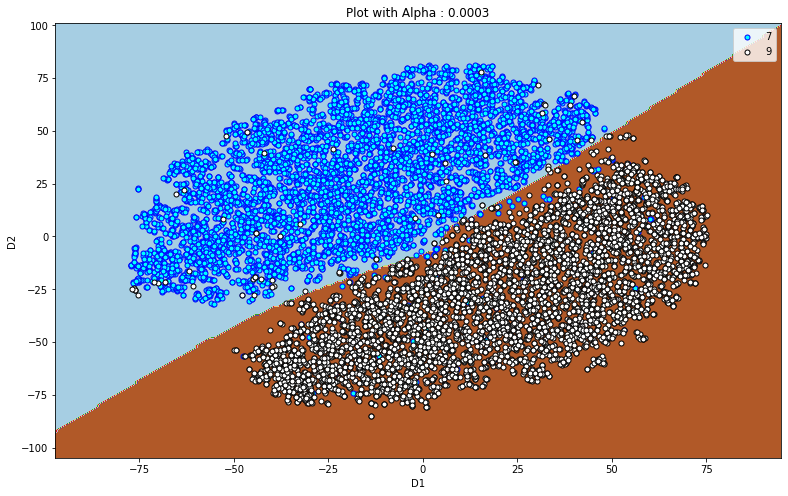

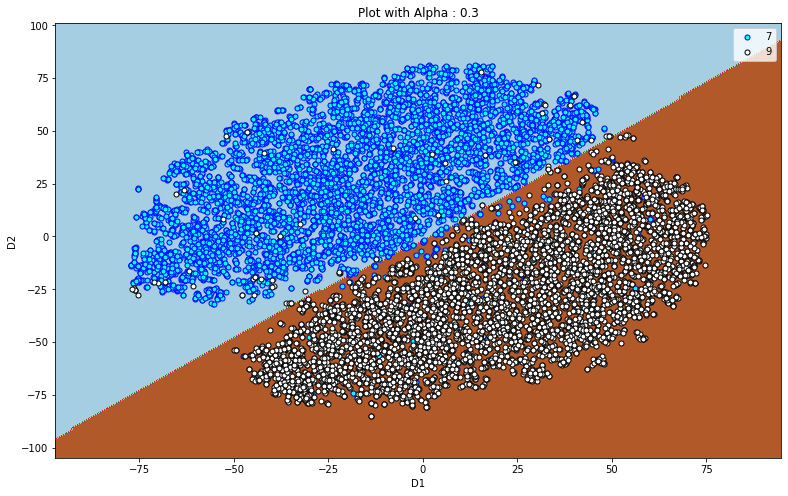

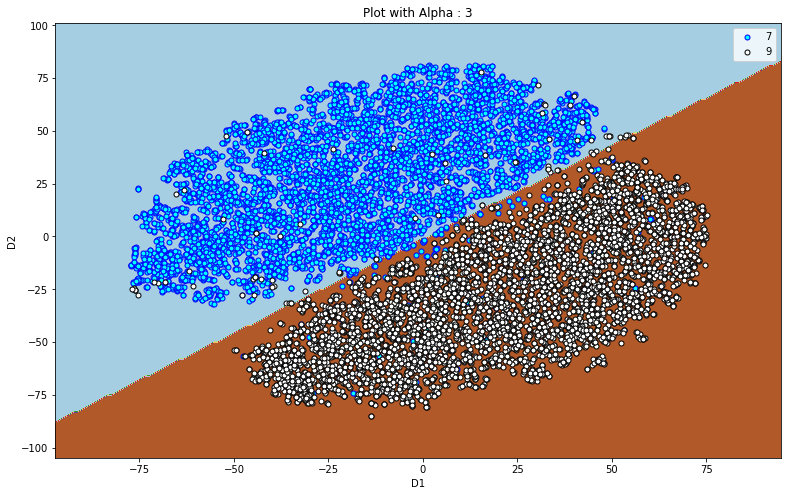

In [10]:
def boundaryplot(X,Y,obj):  
  
  d1min = X[:,0].min()-20
  d1max = X[:,0].max()+20
  d2min = X[:,1].min()-20
  d2max = X[:,1].max()+20
  d1 = np.arange(d1min,d1max,1)
  d2 = np.arange(d2min,d2max,1)
  grid1, grid2 = np.meshgrid(d1,d2)
  t1 = grid1.ravel()
  t2 = grid2.ravel()
  plt.figure(figsize=(13,8))

  xy = np.c_[t1, t2]
  M = obj[0].predict(xy).reshape(grid1.shape)
  

  plt.contourf(grid1, grid2, M ,cmap=plt.cm.Paired)
  #plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k',alpha=0.8)

  X7 = X[Y==7]
  X9 = X[Y==9]
  plt.scatter(X7[:,0], X7[:,1], s = 25, c = 'Aqua', label = '7', edgecolor='Blue')           
  plt.scatter(X9[:,0], X9[:,1], s = 25 ,c = 'White', label = '9', edgecolor='Black')           
  plt.axis('tight')
  plt.xlabel('D1')
  plt.ylabel('D2')
  plt.legend()
  title = 'Plot with Alpha : '+str(obj[1])
  plt.title(title)  
  plt.show()

for i in models:
  boundaryplot(XTrainRed,YTrain,i)
